In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd


pca_df= pd.read_csv('pca_dataframe.csv', low_memory=False)
operational_df = pd.read_csv('ddos_dataset.csv', low_memory=False)

operational_df['label'] = pd.Categorical(operational_df['label']).codes

X_train, X_test, y_train, y_test = train_test_split(
    pca_df[pca_df.columns],
    operational_df['label'],
    stratify=operational_df['label'],
    train_size=0.7,
    random_state=15
)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

model_SVC = SVC()
model_SVC.fit(X_train, y_train)

y_pred_train_KNN = model_KNN.predict(X_train)
y_pred_test_KNN = model_KNN.predict(X_test)

y_pred_train_RFC = model_RFC.predict(X_train)
y_pred_test_RFC = model_RFC.predict(X_test)

y_pred_train_SVC = model_SVC.predict(X_train)
y_pred_test_SVC = model_SVC.predict(X_test)

model: KNN
train set predictions evaluation
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3961
           1       0.98      0.96      0.97      3758
           2       0.97      0.97      0.97      4149
           3       0.98      0.98      0.98      4138
           4       0.99      0.99      0.99      4081
           5       0.95      0.97      0.96       690
           6       1.00      1.00      1.00      4189
           7       0.99      1.00      1.00      4179
           8       0.99      0.99      0.99      3836
           9       0.99      0.99      0.99      3683
          10       1.00      1.00      1.00      4113
          11       1.00      1.00      1.00      4190

    accuracy                           0.99     44967
   macro avg       0.99      0.99      0.99     44967
weighted avg       0.99      0.99      0.99     44967

test set predictions evaluation
              precision    recall  f1-score   support

  

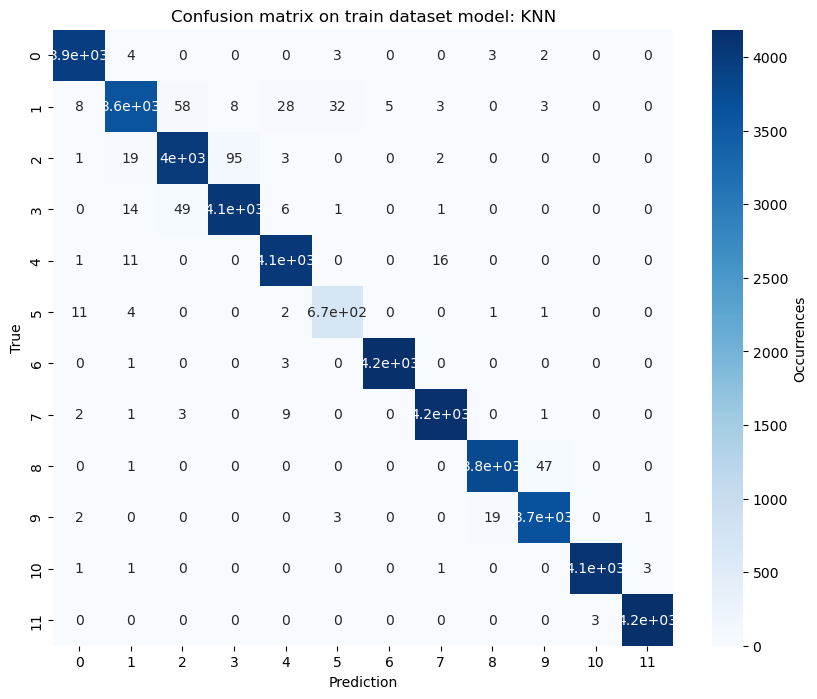

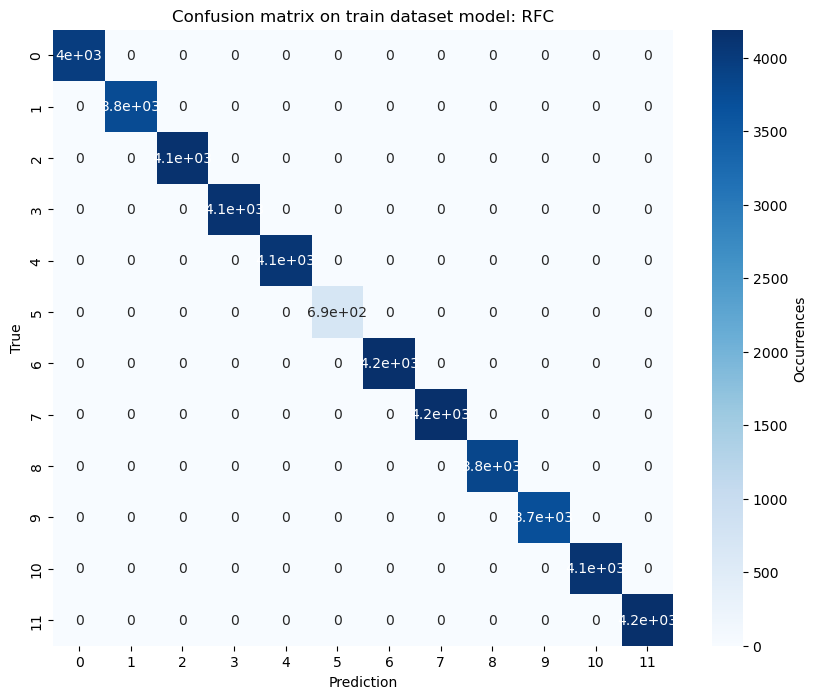

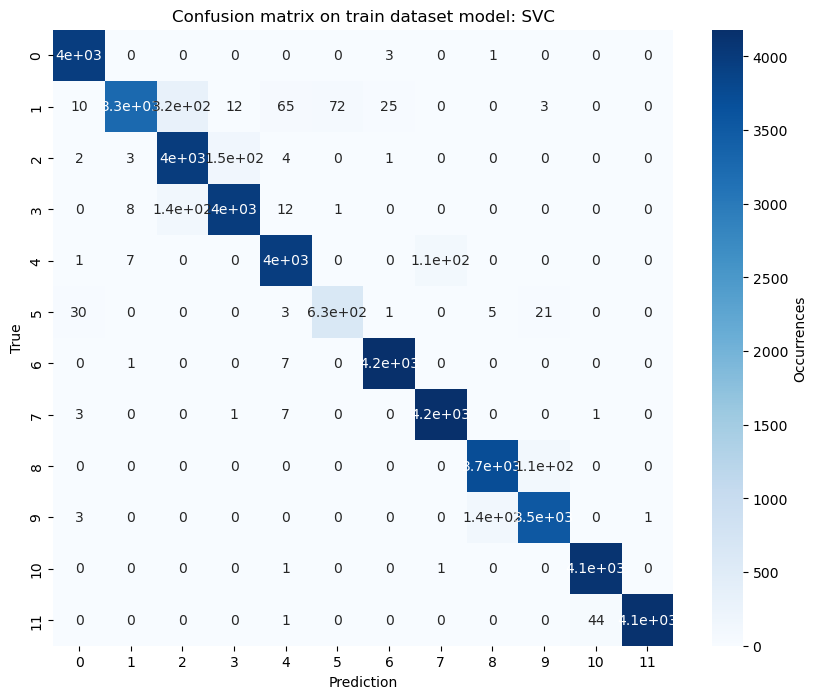

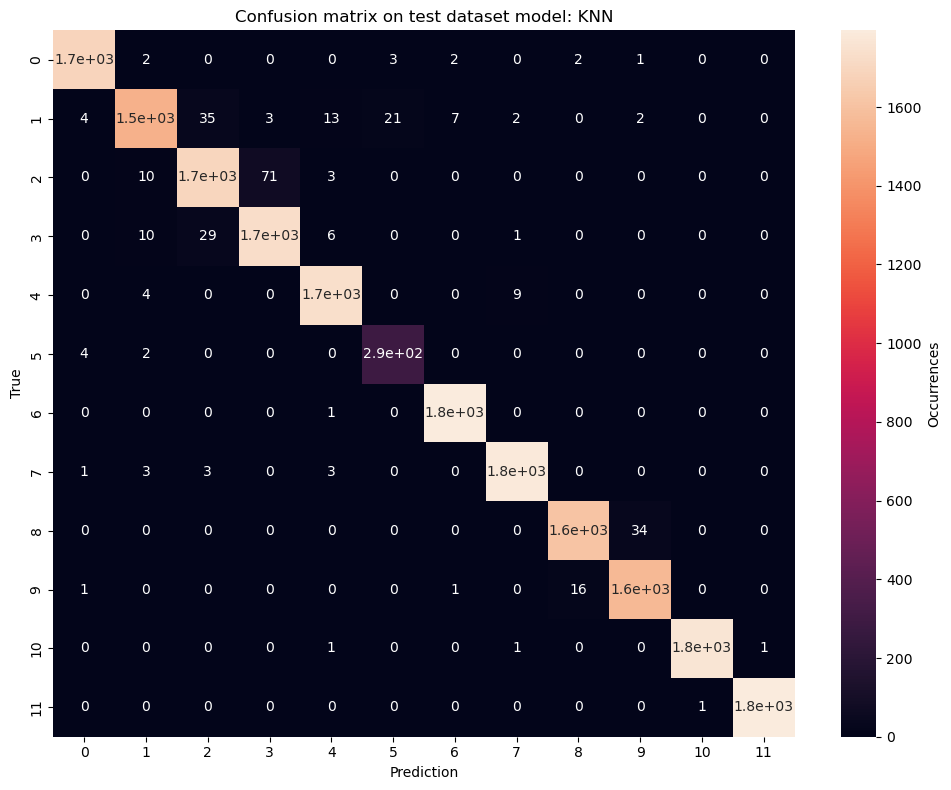

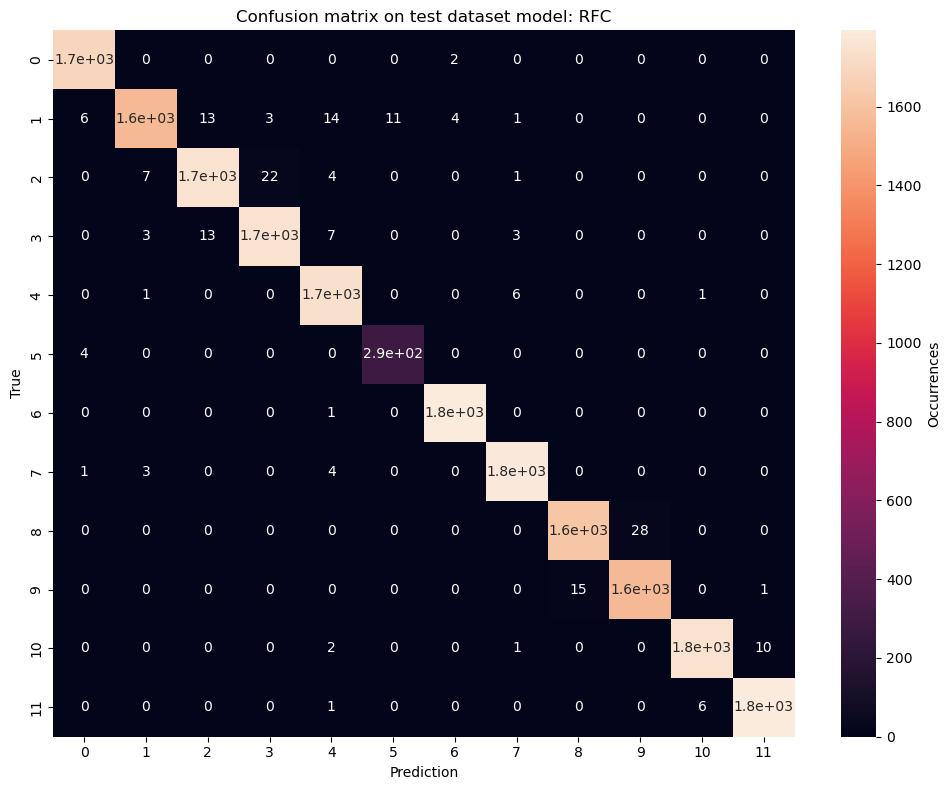

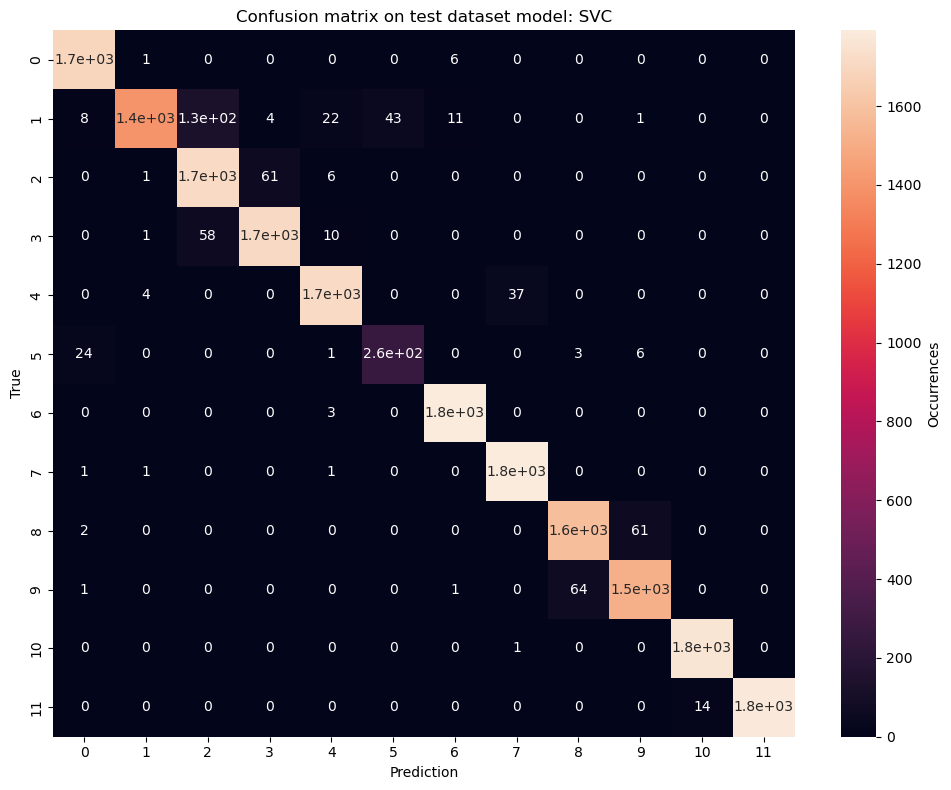

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print('model: KNN')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_KNN))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_KNN))

print('model: RFC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_RFC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_RFC))

print('model: SVC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_SVC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_SVC))

train_predicted = [y_pred_train_KNN, y_pred_train_RFC, y_pred_train_SVC]
test_predicted = [y_pred_test_KNN, y_pred_test_RFC, y_pred_test_SVC]
models = ["KNN", "RFC", "SVC"]

for i, label in enumerate(train_predicted):    
    # get the confusion matrix of test set
    confusion_test = confusion_matrix(y_train, label).round(2)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on train dataset model: {models[i]}')
    plt.show()

for i, label in enumerate(test_predicted):    
    # get the confusion matrix of test set
    confusion_test = confusion_matrix(y_test, label)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test,  annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on test dataset model: {models[i]}')
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for i, label in enumerate(train_predicted):
    print(f'Mean squared error for model: {models[i]} on train dataset')
    print(mean_squared_error(y_train, label))
    print(f'Mean absolute error for model: {models[i]} on train dataset')
    print(mean_absolute_error(y_train, label))

for i, label in enumerate(test_predicted):
    print(f'Mean squared error for model: {models[i]} on test dataset')
    print(mean_squared_error(y_test, label))
    print(f'Mean absolute error for model: {models[i]} on test dataset')
    print(mean_absolute_error(y_test, label))

Mean squared error for model: KNN on train dataset
0.07810171903840595
Mean absolute error for model: KNN on train dataset
0.022594346965552518
Mean squared error for model: RFC on train dataset
0.0
Mean absolute error for model: RFC on train dataset
0.0
Mean squared error for model: SVC on train dataset
0.1463072920141437
Mean absolute error for model: SVC on train dataset
0.05241621633642449
Mean squared error for model: KNN on test dataset
0.11000415110004151
Mean absolute error for model: KNN on test dataset
0.03227480282274803
Mean squared error for model: RFC on test dataset
0.06641760066417601
Mean absolute error for model: RFC on test dataset
0.020651722706517227
Mean squared error for model: SVC on test dataset
0.17216687422166874
Mean absolute error for model: SVC on test dataset
0.056870070568700706
